# Choosing your Houseplant

In [10]:
# Import Packages

import os, sys, csv, random
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import seaborn as sns
import pandas as pd
from PIL import Image
from ipywidgets import widgets
from IPython.display import display

In [11]:
# Load in the dataset

path_to_orig_csv = 'https://raw.githubusercontent.com/biof309/spring2019-group-project-team_plant/master/src/myproject/Plant%20Dataset%20-%20Data%20(2).csv'
plant_orig_ds = pd.read_csv(path_to_orig_csv)

path_to_csv = "https://raw.githubusercontent.com/biof309/spring2019-group-project-team_plant/master/src/myproject/Plant%20Dataset_scale.csv"
plant_ds = pd.read_csv(path_to_csv)
#plant_ds.head()

In [12]:
# List of Questions and Options

questionlist = [
    "What size plant are you looking for?",
    "What size pot do you prefer?",
    "How much light will your indoor plant have?",
    "Do you want a plant that cleans the air?", #This is for clean air plant
    "Do you have a child or pet?", #This is for toxicity
    "Did you want this plant to flower?", 
    "How much temperature fluctuation will this plant encounter?", #This is for plant durability
    "Did you want to give this plant for a special occasion?",
    "How much work do you want to do on this plant?", #This is for pruning
    "Do you tend to underwater or overwater?",
    "How humid is your home?"   
]

optionlist = [
    ["Small", "Medium", "Large"],
    ["Small", "Medium", "Large"],
    ["Low","Medium","High"], 
    ["Yes","No", "Does not matter"],#doesn't matter=yes and no
    ["Yes", "No", "Does not matter"], #Yes= toxicity is 0, No= all other ones
    ["Yes", "No","Does not matter"], #doesn't matter=everything 
    ["Low", "Medium", "High"], 
    ["Yes", "No", "Does not matter"], #doesn't matter=everything
    ["Minimal","Lots","Does not matter"], #minimal=none, lots=regular, doesn't matter=anything
    ["Underwater","Overwater","Does not matter"], #underwater=low, overwater=high, no=anything
    ["Low","Medium","High"]
]

In [13]:
# GUI code for quiz questions:

# Style from: https://github.com/abhijitnathwani/PyQuiz/blob/master/build/lib.linux-x86_64-2.7/py_quiz/__main__.py

import tkinter as tk
import tkinter.messagebox
from ipywidgets import widgets
from IPython.display import display

def main(args=None):
    app = PlantQuiz() # creating the object for Application class()
    app.master.title('Plant Quiz')
    app.mainloop()
    return app

# Class PlantQuiz 
class PlantQuiz(tk.Frame):
    def __init__(self, master=None):
        tkinter.messagebox.showinfo('Welcome!','Are you ready to find out which house plant best suits you??')
        tk.Frame.__init__(self, master)
        self.flag=0
        self.qn = 0
        self.anslist = [None]*len(questionlist)
        self.grid()
        # declaring variables to store question and answer
        self.optionA = tk.StringVar() # control variable for option A
        self.optionB = tk.StringVar() # control variable for option B
        self.optionC = tk.StringVar() # control variable for option C
        self.selected_answer = tk.StringVar() # variable to get the selected answer
        self.question = tk.StringVar() # control variable for the question to be loaded
        self.questions = questionlist
        top = self.winfo_toplevel()
        self.createWidgets(top) # call to create the necessary widgets
        self.load_question(top) # load the first question

    def new_game(self,top):
        self.load_question(top)

    def confirm_quit(self):
        choice = tkinter.messagebox.askyesno('Quit the Quiz','Do you really want to quit?')
        if choice == True:
            self.destroy()
        elif choice == False:
            pass

    def set_ans(self,answer):
        if answer==1:
            self.selected_answer = 1
        elif answer==2:
            self.selected_answer = 2
        elif answer == 3:
            self.selected_answer = 3
        self.flag=1

    def store_ans(self):
    
        self.anslist[self.qn] = self.selected_answer
        #print(str(self.selected_answer))

    def load_question(self,top):
        
        self.radioButtonA.select() # sets the first radio button as the default
        self.radioButtonA.deselect()
        
        self.answers = optionlist[self.qn]
        self.question.set(questionlist[self.qn])
        #length=len(self.question.get())  # get the length of the question
        #width=str(100+10*length)
        width=str(500) #500
        height=str(300) #180
        top.geometry(width+"x"+height)
        
        self.optionA.set(optionlist[self.qn][0])
        self.optionB.set(optionlist[self.qn][1])
        self.optionC.set(optionlist[self.qn][2])

    def next_btn(self, top):
        #print("self.qn: ", self.qn)
        self.store_ans()
        
        if self.qn >= (len(questionlist)-1):
            self.store_ans()
            tkinter.messagebox.showinfo('Bye!','You are finished! Click ok to calculate results.')
            self.destroy()
        else: 
            self.qn = self.qn + 1
            self.load_question(top)
 
    def createWidgets(self,top):
        # Creates widget buttons
        top.resizable(True,True)
        top.grid_columnconfigure(0,weight=1)
        top.grid_columnconfigure(9,weight=1)
        top.grid_rowconfigure(0,weight=1)
        top.grid_rowconfigure(9,weight=1)

        #Creating the buttons
        self.quitButton = tk.Button(self, text='Quit', command=self.confirm_quit)
        self.nextButton = tk.Button(self, text='Next', command=lambda: self.next_btn(top))

        #Creating Radio buttons for options
        self.radioButtonA = tk.Radiobutton(self,anchor='w', 
                            textvariable=self.optionA, 
                            variable = self.selected_answer, 
                            value = 'A',
                            command = lambda: self.set_ans(1)) # the radio button call 'set_ans()' with the number to set the 'selected_answer' variable
        self.radioButtonB = tk.Radiobutton(self,anchor='w',
                            textvariable=self.optionB, 
                            variable = self.selected_answer,
                            value = 'B', 
                            command = lambda: self.set_ans(2))
        self.radioButtonC = tk.Radiobutton(self,anchor='w',
                            textvariable=self.optionC, 
                            variable = self.selected_answer, 
                            value = 'C', 
                            command = lambda: self.set_ans(3))

        #Creating the labels for options and questions
            
        self.label_question = tk.Label(self,textvariable=self.question)
        
        #Packing the widgets in the grid

        self.label_question.grid(column=3,row=1,columnspan=4)
        self.radioButtonA.grid(column=4,row=2, columnspan=3,sticky=tk.N+tk.S+tk.W+tk.E)
        self.radioButtonB.grid(column=4,row=3, columnspan=3,sticky=tk.N+tk.S+tk.W+tk.E)
        self.radioButtonC.grid(column=4,row=4, columnspan=3,sticky=tk.N+tk.S+tk.W+tk.E)
            
        self.quitButton.grid(column=6,row=5) #,sticky=tk.N+tk.S+tk.W+tk.E)
        self.nextButton.grid(column=3,row=5) #,sticky=tk.N+tk.S+tk.W+tk.E)
        
if __name__ == "__main__":
    myquiz = main()
    
# The variable that saves the quiz answers is called myquiz.anslist:
#print(list(myquiz.anslist))


# Plant Selection Mechanism

Takes user responses from PlantQuiz and creates a matrix of 0s and 1s to match against the plant dataset

The plant row with the most 1s will have the highest score

In [14]:
# Converting user response list to dataframe

user_resp = myquiz.anslist
user_resp_df = pd.DataFrame(np.array(user_resp).reshape(1,11)) 

# Creating a 1's and 0's dataframe

    # Question 1

plant_ds['PlantSize'] = (plant_ds['PlantSize'] == user_resp_df.loc[0,0]).astype(int)

    # Question 2

plant_ds['PotSize '] = (plant_ds['PotSize '] == user_resp_df.loc[0,1]).astype(int)

    # Question 3
  
plant_ds['Light '] = (plant_ds['Light '] == user_resp_df.loc[0,2]).astype(int)

    # Question 4 - gonna have to change plant_ds to match user responses - right now "does not matter" does not line up with yes or no
  
if (user_resp_df.loc[0,3]).astype(int) == 3:
    plant_ds['CleanAirPlant'] = 1
else:
    plant_ds['CleanAirPlant'] = (plant_ds['CleanAirPlant'] == user_resp_df.loc[0,3]).astype(int)
  
    # Question 5 - same problem as Q4
if (user_resp_df.loc[0,4]).astype(int) == 3:
    plant_ds['Toxicitylevel'] = 1
else:  
    plant_ds['Toxicitylevel'] = (plant_ds['Toxicitylevel'] == user_resp_df.loc[0,4]).astype(int)

    # Question 6
if (user_resp_df.loc[0,5]).astype(int) == 3:
    plant_ds['Flowering '] = 1
else:
    plant_ds['Flowering '] = (plant_ds['Flowering '] == user_resp_df.loc[0,5]).astype(int)

    # Question 7

plant_ds['TempDurability'] = (plant_ds['TempDurability'] == user_resp_df.loc[0,6]).astype(int)

    # Question 8
if (user_resp_df.loc[0,7]).astype(int) == 3:
    plant_ds['SpecialOccasion '] = 1
else:
    plant_ds['SpecialOccasion '] = (plant_ds['SpecialOccasion '] == user_resp_df.loc[0,7]).astype(int)

    # Question 9
if (user_resp_df.loc[0,8]).astype(int) == 3:
    plant_ds['Pruning '] = 1
else:
    plant_ds['Pruning '] = (plant_ds['Pruning '] == user_resp_df.loc[0,8]).astype(int)

    # Question 10
if (user_resp_df.loc[0,9]).astype(int) == 3:
    plant_ds['Water '] = 1
else:  
    plant_ds['Water '] = (plant_ds['Water '] == user_resp_df.loc[0,9]).astype(int)

    # Question 11
  
plant_ds['Humidity '] = (plant_ds['Humidity '] == user_resp_df.loc[0,10]).astype(int)

#plant_ds.head(30)

# Delete all the columns that we aren't using in the dataframe just to clean it up

slim_plant_df = plant_ds[["Plant", "Plant taxonomy", "PlantSize", "Light ", "Water ", "TempDurability", "Humidity ", "Flowering ", "PotSize ", "Pruning ", "SpecialOccasion ", "CleanAirPlant", "Toxicitylevel"]]

# Create a new column in this new dataset that sums all the ones and zeros
slim_plant_df.loc[:, 'total'] = slim_plant_df.iloc[:, 1:].sum(axis=1)

# Sort dataset by descending numbers of the "sum column"
final_df = slim_plant_df.sort_values(by=['total'], ascending = False)
#final_df.head()

print("Top 5 Plants selected.\n")

Top 5 Plants selected.



# Displaying Results

Displays the top 5 plants in a horizontal bar plot with the percentage match

Allows the user to select one of the plants for more information

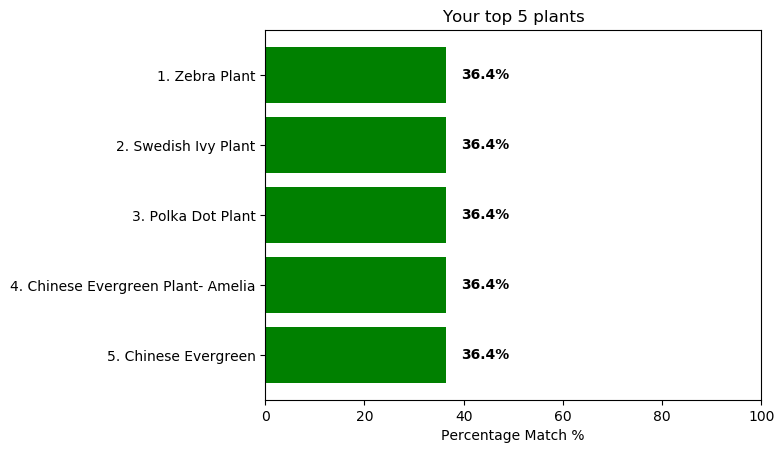

Please enter the number of a plant you are interested in, or type 0: 3
Plant name: Polka Dot Plant

Plant Characteristics:
	Plant taxonomy: Hypoestes
	Plant size: small
	Pot size: small
	Flowers: small

Lifestyle:
	Toxicity Level: 0.0
	Temperature Range: 70.0 - 80.0 degF
	Humidity Level: high
	Good For a Special Occasion? no
	Clean Air Plant: no

Plant Care:
	Sunlight: high
	Water: low
	Pests: yes
	Pruning: regular

Plant Care Recommendations:
	Best type(s) of soil to use: rich airy peat-based soil
	Best way(s) to propagate: stem cuttings




In [ ]:
# Display the top 5 plants

# Show horizontal bar plot with results

y_plants = []
x_perc = []

for ii in range(0,5):
  y_plants = np.append(y_plants,str(ii+1)+". "+str(final_df.iloc[ii,0]))
  x_perc = np.append(x_perc,round(100*(final_df.iloc[ii,13]/11),1))

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(y_plants))
ax.barh(y_pos, x_perc, align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_plants)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage Match %')
ax.set_title('Your top 5 plants')
ax.set_xlim([0,100])

for i, v in enumerate(x_perc):
    perc_label = str(v)+"%"
    ax.text(v + 3, i + .05, perc_label, color='black', fontweight='bold')
plt.show()


# Initializes the number of the plant you want to know more about
pn = 0

pod = plant_orig_ds
pod.set_index("Plant", inplace=True) #Rename the row labels as the plant name
#pod.head()

# Accept user input
pn = int(input('Please enter the number of a plant you are interested in, or type 0: '))-1

# Keep asking for user input and displaying plant information until the user enters 0 (and pn = -1)
while pn != -1:
    plantname = str(final_df.iloc[pn,0])
    print("Plant name:",plantname)
    print("\nPlant Characteristics:")
    
    print("\tPlant taxonomy:",plant_orig_ds.loc[plantname,'Plant taxonomy'])
    print("\tPlant size:",plant_orig_ds.loc[plantname,'PlantSize'])
    print("\tPot size:",plant_orig_ds.loc[plantname,'PotSize '])
    print("\tFlowers:",plant_orig_ds.loc[plantname,'Flowering '])
    
    print("\nLifestyle:")
    print("\tToxicity Level:",plant_orig_ds.loc[plantname,'Toxicitylevel'])
    print("\tTemperature Range:",plant_orig_ds.loc[plantname,"Temp_low (degF)"],"-",plant_orig_ds.loc[plantname,"Temp_high (degF)"],"degF")
    print("\tHumidity Level:",plant_orig_ds.loc[plantname,'Humidity '])
    print("\tGood For a Special Occasion?",plant_orig_ds.loc[plantname,'SpecialOccasion '])
    print("\tClean Air Plant:",plant_orig_ds.loc[plantname,'CleanAirPlant'])
    
    print("\nPlant Care:")
    print("\tSunlight:",plant_orig_ds.loc[plantname,'Light '])
    print("\tWater:",plant_orig_ds.loc[plantname,'Water '])
    print("\tPests:",plant_orig_ds.loc[plantname,'Pests '])
    print("\tPruning:",plant_orig_ds.loc[plantname,'Pruning '])

    print("\nPlant Care Recommendations:")
    print("\tBest type(s) of soil to use:",plant_orig_ds.loc[plantname,'Soil '], "soil")
    print("\tBest way(s) to propagate:",plant_orig_ds.loc[plantname,"Propogation (multiple options)"])
    print("\n")
    
    pn = int(input('Please enter the number of a plant you are interested in, or type 0: '))-1
    print("\n")
  
print("Thank you for taking the plant quiz! We hope you have decided on a great plant!")
print("Please visit https://www.houseplant411.com/houseplant for more info on these plants!")